#Problema 4 de la guía 7
##S. Schiavinato - LU 153/11

###Estimadores y intervalos de confianza

In [1]:
%matplotlib inline
import numpy as np
import numpy.random as rnd
import scipy.misc as misc
import matplotlib.pyplot as plt
import scipy.stats as stats
from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets
plt.rcParams["figure.figsize"] = (5 * (1 + np.sqrt(5)) / 2, 5)
plt.rcParams["lines.linewidth"] = 2.5
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["axes.labelsize"] = 20

:0: FutureWarning: IPython widgets are experimental and may change in the future.


Con la siguiente función obtengo los estimadores a usar en el problema a partir de una muestra con su esperanza y varianza

In [2]:
def estimadores(A, μ, σ):
    N, n = A.shape
    Xbar = np.mean(A, axis = 1)
    x1 = np.sqrt(n)*(Xbar - μ) / σ
    x2 = np.sum((A - μ)**2, axis = 1)/σ**2 
    s2 = np.sum((A - np.array([Xbar for i in range(n)]).T)**2, axis = 1) / (n-1)
    x3 = (n - 1)* s2 / σ**2
    x4 = np.sqrt(n) * (Xbar - μ) / np.sqrt(s2)
    return x1, x2, x3, x4

Controlo a voluntad la cantidad de elementos de cada muestra, parámetro que uso para graficar la distribución de cada estimador

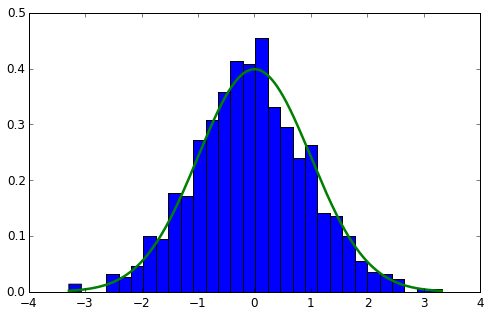

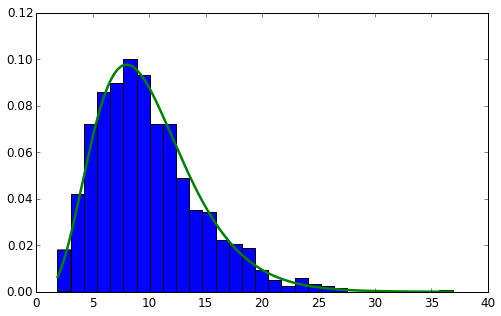

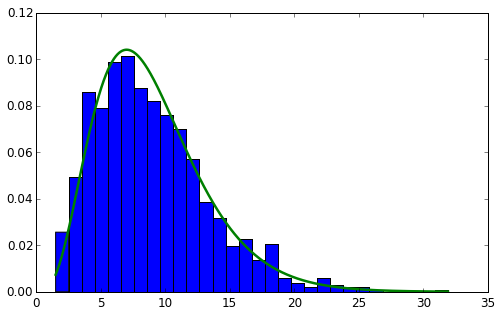

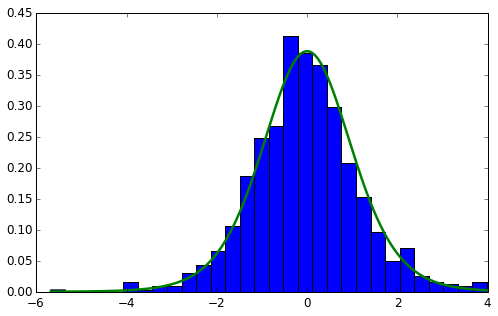

In [3]:
@interact(n = (3, 20, 1))
def G7E4_a(n = 10):
    μ = 10
    σ = 2
    N = 1000
    A = rnd.normal(μ, σ, (N, n))
    
    x1, x2, x3, x4 = estimadores(A, μ, σ)
    
    plt.figure(1)
    h, bins, p = plt.hist(x1, bins = 30, normed = True);
    t = np.linspace(bins.min(), bins.max() , 10000)
    plt.plot(t, stats.norm(0,1).pdf(t))
    
    plt.figure(2)
    h, bins, p = plt.hist(x2, bins = 30, normed = True);
    t = np.linspace(bins.min(), bins.max() , 10000)
    plt.plot(t, stats.chi2(n).pdf(t))

    plt.figure(3)
    h, bins, p = plt.hist(x3, bins = 30, normed = True);
    t = np.linspace(bins.min(), bins.max() , 10000)
    plt.plot(t, stats.chi2(n - 1).pdf(t))

    plt.figure(4)
    h, bins, p = plt.hist(x4, bins = 30, normed = True);
    t = np.linspace(bins.min(), bins.max() , 10000)
    plt.plot(t, stats.t(n - 1).pdf(t));